In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [408]:
# Define the KNN class
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X, y):
        # Store training data
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        # Ensure X is a numpy array
        X = np.array(X)
        predictions = []
        for x in X:
            # Compute distances between the point x and all training points
            distances = self.compute_distance(self.X_train, x)
            # Get the indices of the k closest points
            k_indices = np.argsort(distances)[:self.k]
            # Get the labels of the k closest points
            k_nearest_labels = self.y_train[k_indices]
            # Find the most common label
            prediction = self._predict_class(k_nearest_labels)
            predictions.append(prediction)
        return np.array(predictions)
    
    def predict_proba(self, X):
        # Ensure X is a numpy array
        X = np.array(X)
        probas = []
        for x in X:
            distances = self.compute_distance(self.X_train, x)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            proba = self._predict_probability(k_nearest_labels)
            probas.append(proba)
        return np.array(probas)

    def compute_distance(self, X1, X2):
        # Compute distances based on the chosen metric
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((X1 - X2) ** 2, axis=1))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(X1 - X2), axis=1)
        elif self.distance_metric == 'minkowski':
            return np.sum(np.abs(X1 - X2) ** 3, axis=1) ** (1/3)
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")

    def _predict_class(self, k_nearest_labels):
        # Get the most common class among the nearest neighbors
        counter = Counter(k_nearest_labels)
        return counter.most_common(1)[0][0]
    
    def _predict_probability(self, k_nearest_labels):
        # Get the probability distribution for class 0 and 1
        counter = Counter(k_nearest_labels)
        total = sum(counter.values())
        proba_0 = counter.get(0, 0) / total
        proba_1 = counter.get(1, 0) / total
        return np.array([proba_0, proba_1])

In [409]:
df = pd.read_csv('train.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15672983.0,Ives,671.0,Germany,Male,33.0,8.0,102994.04,1.0,1.0,1.0,176471.78,0.0
1,1,15617304.0,Ojiofor,663.0,France,Male,29.0,7.0,0.00,2.0,0.0,0.0,161807.17,0.0
2,2,15787026.0,Lai,710.0,France,Male,32.0,1.0,0.00,2.0,1.0,0.0,44001.11,0.0
3,3,15593365.0,Yobachi,686.0,France,Male,52.0,9.0,82596.80,1.0,0.0,0.0,125111.71,0.0
4,4,15693637.0,Rizzo,675.0,France,Male,42.0,6.0,129968.67,1.0,1.0,1.0,70563.90,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15634310.0,Lettiere,607.0,Spain,Male,39.0,6.0,0.00,2.0,1.0,0.0,38252.25,0.0
14996,14996,15743817.0,Ch'iu,627.0,France,Male,26.0,4.0,0.00,2.0,1.0,0.0,81451.21,0.0
14997,14997,15770041.0,Ch'eng,610.0,France,Female,54.0,9.0,0.00,2.0,0.0,1.0,123475.88,1.0
14998,14998,15698028.0,Chia,717.0,Germany,Male,31.0,1.0,130575.26,1.0,0.0,1.0,23861.62,0.0


In [410]:
df['Exited'].value_counts()

Exited
0.0    11967
1.0     3033
Name: count, dtype: int64

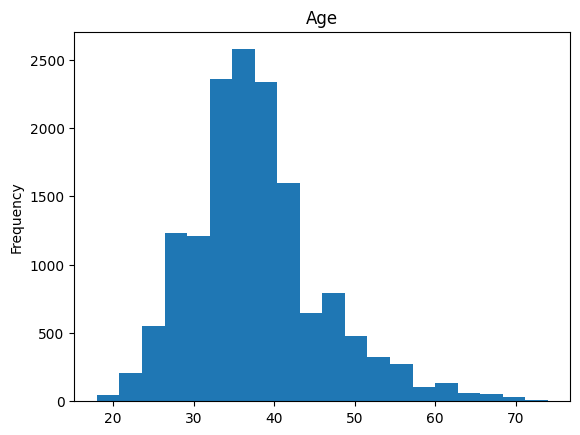

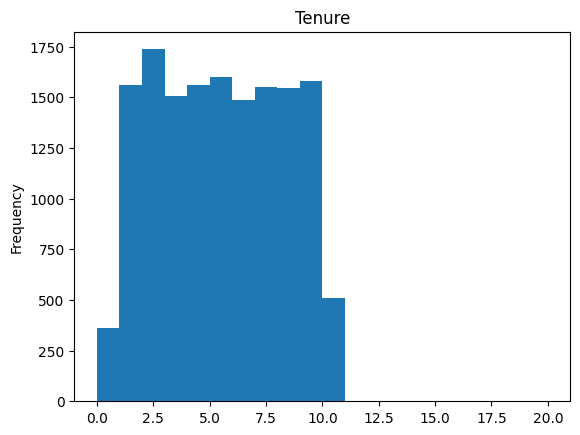

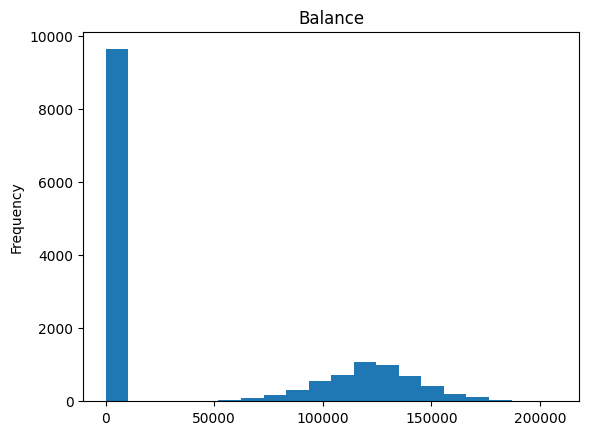

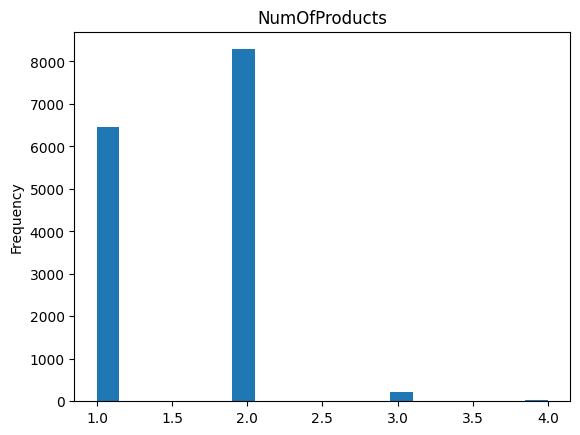

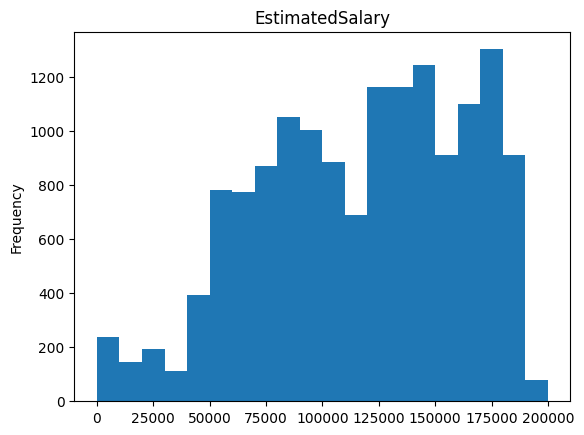

In [411]:
for col in ['Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']:
    # df[col].hist(bins=20)
    # plot
    df[col].plot(kind='hist', bins=20, title=col)
    plt.show()

In [412]:
features = ['CreditScore', 'Germany','France','Spain','Gender','Age','Tenure','ZeroBal','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [413]:
# Define data preprocessing function
def preprocess_data(train_path, test_path):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    # combined data
    data = pd.concat([train_data, test_data])

    # TODO: Implement data preprocessing
    # Handle categorical variables, scale features, etc

    # need to convert categorical variables to numerical
    # Geography: France, Germany, Spain, use one hot encoding
    # train_data['Geography'] = train_data['Geography'].map({'France': 0, 'Germany': 0.5, 'Spain': 1})
    # test_data['Geography'] = test_data['Geography'].map({'France': 0, 'Germany': 0.5, 'Spain': 1})
    train_data['Germany'] = (train_data['Geography'] == 'Germany').astype(int)
    train_data['France'] = (train_data['Geography'] == 'France').astype(int)
    train_data['Spain'] = (train_data['Geography'] == 'Spain').astype(int)
    test_data['Germany'] = (test_data['Geography'] == 'Germany').astype(int)
    test_data['France'] = (test_data['Geography'] == 'France').astype(int)
    test_data['Spain'] = (test_data['Geography'] == 'Spain').astype(int)
    
    # Gender
    train_data['Gender'] = train_data['Gender'].map({'Male':0,'Female':1})
    test_data['Gender'] = test_data['Gender'].map({'Male':0,'Female':1})

    # scale numerical features, feature dependent how
    # age
    # get mean and std of age
    age_mean = data['Age'].mean()
    age_std = data['Age'].std()
    train_data['Age'] = (train_data['Age'] - age_mean) / age_std
    test_data['Age'] = (test_data['Age'] - age_mean) / age_std
    # normalize age to 0 to 1
    # age_min = data['Age'].min()
    # age_max = data['Age'].max()
    # train_data['Age'] = (train_data['Age'] - age_min) / (age_max - age_min)
    # test_data['Age'] = (test_data['Age'] - age_min) / (age_max - age_min)

    # tenure uniform ish dist
    tenure_min = data['Tenure'].min()
    tenure_max = data['Tenure'].max()
    train_data['Tenure'] = (train_data['Tenure'] - tenure_min) / (tenure_max - tenure_min)
    test_data['Tenure'] = (test_data['Tenure'] - tenure_min) / (tenure_max - tenure_min)

    # balance, note that its either 0 or normal, so make new feature ZeroBal
    train_data['ZeroBal'] = (train_data['Balance'] == 0).astype(int)
    test_data['ZeroBal'] = (test_data['Balance'] == 0).astype(int)

    # balance (non zero)
    balance_mean = data[data['Balance']!=0]['Balance'].mean()
    balance_std = data[data['Balance']!=0]['Balance'].std()

    train_data['Balance'] = (train_data['Balance'] - balance_mean) / balance_std
    test_data['Balance'] = (test_data['Balance'] - balance_mean) / balance_std
    # min max scale to 0 1
    # balance_min = data['Balance'].min()
    # balance_max = data['Balance'].max()
    # train_data['Balance'] = (train_data['Balance'] - balance_min) / (balance_max - balance_min)
    # test_data['Balance'] = (test_data['Balance'] - balance_min) / (balance_max - balance_min)

    # NumOfProducts 1,2,3,4 subtract 1 divide by 3
    train_data['NumOfProducts'] = (train_data['NumOfProducts'] - 1) / 3
    test_data['NumOfProducts'] = (test_data['NumOfProducts'] - 1) / 3

    # HasCrCard, IsActiveMember, 0,1 no need to scale (for now)

    # EstimatedSalary not quite normal or uniform, so min-max scaling
    salary_min = data['EstimatedSalary'].min()
    salary_max = data['EstimatedSalary'].max()

    train_data['EstimatedSalary'] = (train_data['EstimatedSalary'] - salary_min) / (salary_max - salary_min)
    test_data['EstimatedSalary'] = (test_data['EstimatedSalary'] - salary_min) / (salary_max - salary_min)

    # RESAMPLING:

    # # due to class imbalance, we need to oversample the minority class
    # # oversample the minority class
    # # get the minority class
    # minority_class = train_data[train_data['Exited'] == 1]

    # # get the majority class
    # majority_class = train_data[train_data['Exited'] == 0]

    # # get the number of samples in the minority class
    # n_minority = minority_class.shape[0]

    # # get the number of samples in the majority class
    # n_majority = majority_class.shape[0]

    # # get the ratio of the majority to minority
    # # ratio = n_majority // n_minority

    # # get the number of samples to generate
    # n_generate = n_majority - n_minority

    # # generate new samples
    # new_samples = minority_class.sample(n_generate, replace=True)

    # # append the new samples to the minority class
    # train_data = pd.concat([train_data, new_samples], ignore_index=True)

    # # shuffle the data
    # train_data = train_data.sample(frac=1).reset_index(drop=True)

    
    return train_data[features], train_data['Exited'], test_data


In [414]:
features = ['CreditScore', 'Germany','France','Spain','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [415]:
# Define data preprocessing function
# WITH ROBUST SCALING
def preprocess_data(train_path, test_path):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    # combined data
    data = pd.concat([train_data, test_data])

    # need to convert categorical variables to numerical
    # Geography: France, Germany, Spain, use one hot encoding
    train_data['Germany'] = (train_data['Geography'] == 'Germany').astype(int)
    train_data['France'] = (train_data['Geography'] == 'France').astype(int)
    train_data['Spain'] = (train_data['Geography'] == 'Spain').astype(int)
    test_data['Germany'] = (test_data['Geography'] == 'Germany').astype(int)
    test_data['France'] = (test_data['Geography'] == 'France').astype(int)
    test_data['Spain'] = (test_data['Geography'] == 'Spain').astype(int)
    
    # Gender
    train_data['Gender'] = train_data['Gender'].map({'Male':0,'Female':1})
    test_data['Gender'] = test_data['Gender'].map({'Male':0,'Female':1})

    # scale numerical features
    # age
    # get quartiles
    age_q1 = data['Age'].quantile(0.25)
    age_q3 = data['Age'].quantile(0.75)
    train_data['Age'] = (train_data['Age'] - age_q1) / (age_q3 - age_q1)
    test_data['Age'] = (test_data['Age'] - age_q1) / (age_q3 - age_q1)

    # tenure
    tenure_q1 = data['Tenure'].quantile(0.25)
    tenure_q3 = data['Tenure'].quantile(0.75)
    train_data['Tenure'] = (train_data['Tenure'] - tenure_q1) / (tenure_q3 - tenure_q1)
    test_data['Tenure'] = (test_data['Tenure'] - tenure_q1) / (tenure_q3 - tenure_q1)

    # balance
    balance_q1 = data['Balance'].quantile(0.25)
    balance_q3 = data['Balance'].quantile(0.75)
    train_data['Balance'] = (train_data['Balance'] - balance_q1) / (balance_q3 - balance_q1)
    test_data['Balance'] = (test_data['Balance'] - balance_q1) / (balance_q3 - balance_q1)

    # NumOfProducts 1,2,3,4 subtract 1 divide by 3
    train_data['NumOfProducts'] = (train_data['NumOfProducts'] - 1) / 3
    test_data['NumOfProducts'] = (test_data['NumOfProducts'] - 1) / 3

    # HasCrCard, IsActiveMember, 0,1 no need to scale (for now)

    # EstimatedSalary
    salary_q1 = data['EstimatedSalary'].quantile(0.25)
    salary_q3 = data['EstimatedSalary'].quantile(0.75)
    train_data['EstimatedSalary'] = (train_data['EstimatedSalary'] - salary_q1) / (salary_q3 - salary_q1)
    test_data['EstimatedSalary'] = (test_data['EstimatedSalary'] - salary_q1) / (salary_q3 - salary_q1)
    
    return train_data[features], train_data['Exited'], test_data


In [416]:
# Age: 0.37465299569398564
# NumOfProducts: 0.23987763702736314
# IsActiveMember: 0.065830227742042
# Balance: 0.05700030435776841
# EstimatedSalary: 0.05468940645738689
# CreditScore: 0.05271492122476942
# Germany: 0.04038295111053886
# Tenure: 0.03132314903469856
# Gender: 0.02935410213113104
# ZeroBal: 0.024761892653385784
# France: 0.015138171391504283
# HasCrCard: 0.007458179003018782
# Spain: 0.006816062172407282

In [417]:
# Define data preprocessing function
# WITH ROBUST SCALING
def preprocess_data(train_path, test_path):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    # combined data
    data = pd.concat([train_data, test_data])

    # need to convert categorical variables to numerical
    # Geography: France, Germany, Spain, use one hot encoding
    train_data['Germany'] = (train_data['Geography'] == 'Germany').astype(int)     * 0.04038295111053886
    train_data['France'] = (train_data['Geography'] == 'France').astype(int)    * 0.015138171391504283
    train_data['Spain'] = (train_data['Geography'] == 'Spain').astype(int)     * 0.006816062172407282
    test_data['Germany'] = (test_data['Geography'] == 'Germany').astype(int)     * 0.04038295111053886
    test_data['France'] = (test_data['Geography'] == 'France').astype(int)     * 0.015138171391504283 
    test_data['Spain'] = (test_data['Geography'] == 'Spain').astype(int)     * 0.006816062172407282
    
    # Gender
    train_data['Gender'] = train_data['Gender'].map({'Male':0,'Female':1})   * 0.02935410213113104
    test_data['Gender'] = test_data['Gender'].map({'Male':0,'Female':1})    * 0.02935410213113104

    # scale numerical features
    # age
    # get quartiles
    age_q1 = data['Age'].quantile(0.25)
    age_q3 = data['Age'].quantile(0.75)
    train_data['Age'] = (train_data['Age'] - age_q1) / (age_q3 - age_q1)     * 0.37465299569398564
    test_data['Age'] = (test_data['Age'] - age_q1) / (age_q3 - age_q1)      * 0.37465299569398564

    # tenure
    tenure_q1 = data['Tenure'].quantile(0.25)
    tenure_q3 = data['Tenure'].quantile(0.75)
    train_data['Tenure'] = (train_data['Tenure'] - tenure_q1) / (tenure_q3 - tenure_q1)      * 0.03132314903469856
    test_data['Tenure'] = (test_data['Tenure'] - tenure_q1) / (tenure_q3 - tenure_q1)    * 0.03132314903469856

    # balance
    balance_q1 = data['Balance'].quantile(0.25)
    balance_q3 = data['Balance'].quantile(0.75)
    train_data['Balance'] = (train_data['Balance'] - balance_q1) / (balance_q3 - balance_q1)     * 0.05700030435776841
    test_data['Balance'] = (test_data['Balance'] - balance_q1) / (balance_q3 - balance_q1)     * 0.05700030435776841

    # NumOfProducts 1,2,3,4 subtract 1 divide by 3
    train_data['NumOfProducts'] = (train_data['NumOfProducts'] - 1) / 3     * 0.23987763702736314
    test_data['NumOfProducts'] = (test_data['NumOfProducts'] - 1) / 3     * 0.23987763702736314

    # HasCrCard, IsActiveMember, 0,1 no need to scale (for now)
    train_data['HasCrCard'] = train_data['HasCrCard']     * 0.007458179003018782
    test_data['HasCrCard'] = test_data['HasCrCard']     * 0.007458179003018782

    train_data['IsActiveMember'] = train_data['IsActiveMember']     * 0.065830227742042
    test_data['IsActiveMember'] = test_data['IsActiveMember']     * 0.065830227742042

    # EstimatedSalary
    salary_q1 = data['EstimatedSalary'].quantile(0.25)
    salary_q3 = data['EstimatedSalary'].quantile(0.75)
    train_data['EstimatedSalary'] = (train_data['EstimatedSalary'] - salary_q1) / (salary_q3 - salary_q1)     * 0.05468940645738689
    test_data['EstimatedSalary'] = (test_data['EstimatedSalary'] - salary_q1) / (salary_q3 - salary_q1)     * 0.05468940645738689

    # CreditScore
    credit_q1 = data['CreditScore'].quantile(0.25)
    credit_q3 = data['CreditScore'].quantile(0.75)
    train_data['CreditScore'] = (train_data['CreditScore'] - credit_q1) / (credit_q3 - credit_q1)     * 0.05271492122476942
    test_data['CreditScore'] = (test_data['CreditScore'] - credit_q1) / (credit_q3 - credit_q1)     * 0.05271492122476942
    
    return train_data[features], train_data['Exited'], test_data


In [418]:
# Define cross-validation function
def cross_validate(X, y, knn, n_splits=5):
    # Shuffle the data
    X = X.sample(frac=1).reset_index(drop=True)
    y = y.sample(frac=1).reset_index(drop=True)

    # Split data into n_splits
    n = len(X)
    split_size = n // n_splits
    scores = []

    for i in range(n_splits):
        print('Starting split', i)
        # Split data
        start = i * split_size
        end = (i + 1) * split_size
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = pd.concat([X[:start], X[end:]])
        y_train = pd.concat([y[:start], y[end:]])

        # Fit model
        knn.fit(X_train.values, y_train.values)

        # Predict
        y_pred = knn.predict(X_test.values)

        # Compute accuracy
        score = np.mean(y_pred == y_test.values)
        scores.append(score)

    return scores


In [419]:
# Load and preprocess data
X, y, X_test = preprocess_data('train.csv', 'test.csv')

In [420]:
X

,CreditScore,Germany,France,Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.033817,0.040383,0.000000,0.000000,0.000000,0.037465,0.039154,0.053500,0.000000,0.007458,0.06583,0.070072
1,0.029839,0.000000,0.015138,0.000000,0.000000,-0.112396,0.031323,0.000000,0.079959,0.000000,0.00000,0.059134
2,0.053212,0.000000,0.015138,0.000000,0.000000,0.000000,-0.015662,0.000000,0.079959,0.007458,0.00000,-0.028736
3,0.041277,0.000000,0.015138,0.000000,0.000000,0.749306,0.046985,0.042904,0.000000,0.000000,0.00000,0.031763
4,0.035806,0.000000,0.015138,0.000000,0.000000,0.374653,0.023492,0.067512,0.000000,0.007458,0.06583,-0.008923
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.001989,0.000000,0.000000,0.006816,0.000000,0.262257,0.023492,0.000000,0.079959,0.007458,0.00000,-0.033024
14996,0.011935,0.000000,0.015138,0.000000,0.000000,-0.224792,0.007831,0.000000,0.079959,0.007458,0.00000,-0.000802
14997,0.003481,0.000000,0.015138,0.000000,0.029354,0.824237,0.046985,0.000000,0.079959,0.000000,0.06583,0.030543
14998,0.056693,0.040383,0.000000,0.000000,0.000000,-0.037465,-0.015662,0.067827,0.000000,0.000000,0.06583,-0.043758


In [421]:
X_test[features]

,CreditScore,Germany,France,Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.076089,0.0,0.015138,0.0,0.029354,0.337188,-0.007831,0.000000,0.079959,0.007458,0.06583,0.067853
1,0.122836,0.0,0.015138,0.0,0.000000,0.074931,0.007831,0.000000,0.079959,0.007458,0.06583,0.017348
2,0.000995,0.0,0.015138,0.0,0.029354,-0.224792,0.046985,0.063387,0.000000,0.007458,0.06583,-0.015309
3,0.000995,0.0,0.015138,0.0,0.029354,0.074931,0.046985,0.000000,0.159918,0.007458,0.00000,-0.013193
4,0.044758,0.0,0.015138,0.0,0.000000,0.149861,0.000000,0.068445,0.000000,0.007458,0.06583,0.010785
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.032822,0.0,0.015138,0.0,0.000000,0.112396,0.031323,0.000000,0.079959,0.007458,0.00000,0.028549
9996,-0.000995,0.0,0.015138,0.0,0.000000,0.149861,0.023492,0.000000,0.079959,0.007458,0.06583,-0.015813
9997,0.069623,0.0,0.015138,0.0,0.000000,-0.187326,0.031323,0.000000,0.000000,0.007458,0.06583,0.075924
9998,0.053710,0.0,0.015138,0.0,0.029354,0.299722,0.015662,0.000000,0.000000,0.000000,0.00000,0.063779


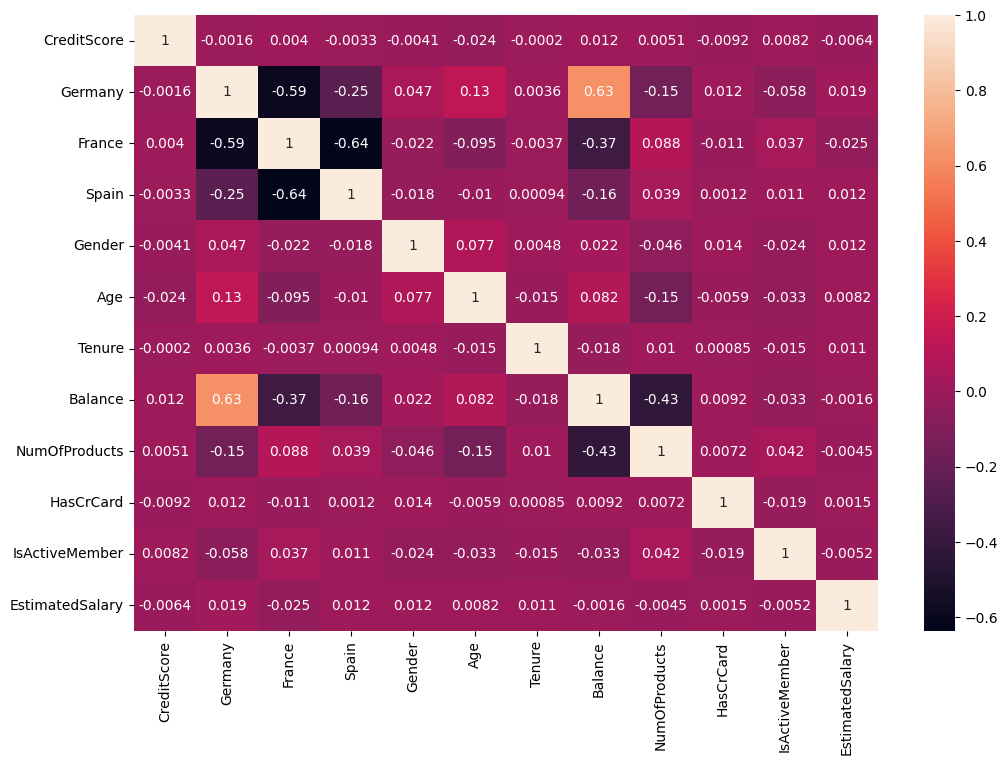

In [422]:
# feature correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Set the figure size
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [423]:
# need to implement roc_auc_score without sklearn
def roc_auc_score(y_true, y_pred):
    # Compute the ROC-AUC score
    n_positive = np.sum(y_true == 1)
    n_negative = np.sum(y_true == 0)
    total_pairs = n_positive * n_negative

    n_tp = 0
    n_pairs = 0
    auc = 0

    # Iterate over all pairs of data points
    for i in range(len(y_true)):
        for j in range(len(y_true)):
            # If the pair is valid
            if y_true[i] > y_true[j]:
                n_pairs += 1
                # Update the number of true positives
                n_tp += y_pred[i] > y_pred[j]

    # Compute the ROC-AUC score
    auc = n_tp / total_pairs
    return auc

In [424]:
from sklearn.metrics import roc_auc_score

In [426]:
# Define cross-validation function using predict_proba
def cross_validate_prob(X, y, knn, n_splits=5):
    # Shuffle the data
    # X = X.sample(frac=1).reset_index(drop=True)
    # y = y.sample(frac=1).reset_index(drop=True)

    # Split data into n_splits
    n = len(X)
    split_size = n // n_splits
    scores = []

    for i in range(n_splits):
        print('Starting split', i)
        # Split data
        start = i * split_size
        end = (i + 1) * split_size
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = pd.concat([X[:start], X[end:]])
        y_train = pd.concat([y[:start], y[end:]])

        # Fit model
        knn.fit(X_train.values, y_train.values)

        # Predict
        y_proba = knn.predict_proba(X_test.values)

        # Compute log loss
        # score = log_loss(y_test.values, y_proba)
        score = roc_auc_score(y_test.values, y_proba[:, 1])
        scores.append(score)

    return scores

# tune hyperparameters
# Define hyperparameters to search
k_values = [40,45,50,55,60]
k_values = [45]

distance_metrics = ['manhattan',]
# distance_metrics = ['minkowski','euclidean', 'manhattan']


# Perform grid search
best_score = -np.inf
best_k = None
best_distance_metric = None

for k in k_values:
    for distance_metric in distance_metrics:
        knn = KNN(k=k, distance_metric=distance_metric)
        cv_scores = cross_validate_prob(X, y, knn)
        # print info oneline
        print(f'k={k}, distance_metric={distance_metric}, mean auc roc={np.mean(cv_scores)}')

        mean_score = np.mean(cv_scores)
        if mean_score > best_score:
            best_score = mean_score
            best_k = k
            best_distance_metric = distance_metric

print("Best hyperparameters:")
print("k:", best_k)
print("distance_metric:", best_distance_metric)
print("Mean cross-validation log loss:", best_score)

# Train on full dataset with optimal hyperparameters
# knn = KNN(k=best_k, distance_metric=best_distance_metric)
# knn.fit(X, y)



Starting split 0
Starting split 1
Starting split 2
Starting split 3
Starting split 4
k=45, distance_metric=manhattan, mean auc roc=0.915882145876149
Best hyperparameters:
k: 45
distance_metric: manhattan
Mean cross-validation log loss: 0.915882145876149


In [405]:
raise Exception('stop here, dont make file!')

Exception: stop here

In [429]:
# Make predictions on test set with single model
# Train on full dataset with optimal hyperparameters
# 45, manhattan, robust scaling with quartiles using custom scaling
knn = KNN(k=45, distance_metric='manhattan')
knn.fit(X.values, y)

In [ ]:
test_proba = knn.predict_proba(X_test[features].to_numpy())

# Save test predictions
pd.DataFrame({'id': pd.read_csv('test.csv')['id'], 'Exited': test_proba[:, 1]}).to_csv('submissions.csv', index=False)

In [ ]:
# since knn more or less assigns equal weighting to each feature, we can assign a weighting ourselves
# we could use a bunch of tuning to do this, but we can also just use the feature importance from another model
# this should work roughly well enough for our purposes

In [427]:
# try random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

n = len(X)

# try on 90% of the data
rf.fit(X.values[n//10:], y[n//10:])

# predict on the test set
test_proba = rf.predict_proba(X.values[:n//10])

# get the roc auc score
print(roc_auc_score(y[:n//10], test_proba[:, 1]))

# print feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print(f'{features[indices[f]]}: {importances[indices[f]]}')


0.920010231473332
Age: 0.3863935306650381
NumOfProducts: 0.2308978673135888
Balance: 0.07830162951665777
IsActiveMember: 0.06639455479569127
EstimatedSalary: 0.055417398488905235
CreditScore: 0.05185880461220164
Germany: 0.05012947274481793
Tenure: 0.031036732217498274
Gender: 0.02663586060001837
France: 0.011201153091131085
HasCrCard: 0.006873717638686214
Spain: 0.004859278315765454


In [ ]:
# get top 8 features
features = ['Age', 'NumOfProducts', 'Balance', 'IsActiveMember', 'EstimatedSalary', 'CreditScore', 'Germany', 'Tenure']

In [ ]:
# we can use the feature importances to select the most important features
# or weight features based on their importance